In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [9]:
df1 = pd.read_csv("subject-info.csv")
df2 = pd.read_csv("test_measure.csv")


In [10]:
df1


,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test
0,10.8,48.8,163.0,39.0,20.7,1,543,543_1
1,11.8,41.0,150.0,41.0,22.3,1,11,11_1
2,12.2,46.0,160.0,37.0,21.5,0,829,829_1
3,13.2,71.0,190.0,49.0,23.8,1,284,284_1
4,13.7,53.8,169.7,40.0,25.3,0,341,341_1
...,...,...,...,...,...,...,...,...
987,59.1,64.7,172.0,38.0,24.4,0,856,856_2
988,59.7,65.2,172.0,51.0,16.8,0,856,856_3
989,61.3,102.0,185.0,56.0,20.5,0,390,390_1
990,61.6,74.0,169.0,46.0,23.9,0,596,596_1


In [11]:
df2


,time,Speed,HR,VO2,VCO2,RR,VE,ID_test,ID
0,0,5.0,63.0,478.0,360.0,27.0,13.3,2_1,2
1,2,5.0,75.0,401.0,295.0,23.0,10.3,2_1,2
2,4,5.0,82.0,449.0,319.0,29.0,12.2,2_1,2
3,7,5.0,87.0,461.0,340.0,28.0,12.8,2_1,2
4,9,5.0,92.0,574.0,417.0,28.0,14.6,2_1,2
...,...,...,...,...,...,...,...,...,...
575082,926,5.0,148.0,1350.0,1699.0,35.0,65.7,857_1,857
575083,927,5.0,147.0,1275.0,1605.0,32.0,60.1,857_1,857
575084,929,5.0,147.0,1259.0,1566.0,29.0,57.0,857_1,857
575085,931,5.0,147.0,1278.0,1587.0,31.0,58.5,857_1,857


#### 17. Display a histogram showing the distribution of athletes by their BMI values.

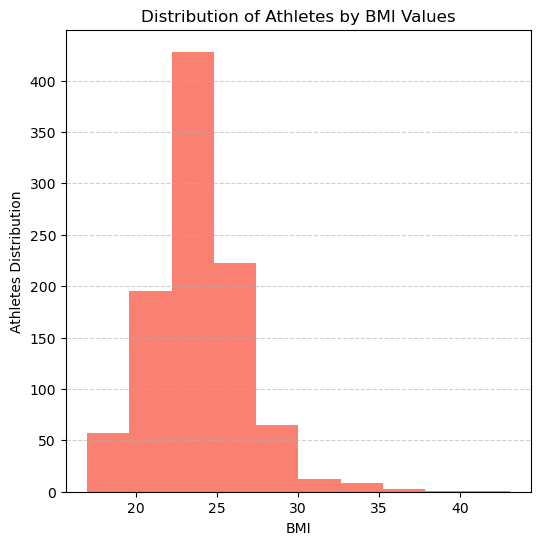

In [12]:
df_copy = df1.copy()

df_copy['Height_m'] = df_copy['Height']/100  #height im cm to height in m
df_copy['BMI'] = df_copy['Weight']/ (df_copy['Height_m']**2)  
df_copy['BMI']

#creating histogram
plt.figure(figsize=(6,6))
plt.hist(df_copy['BMI'], bins=10, color='salmon')
plt.title('Distribution of Athletes by BMI Values')
plt.xlabel('BMI')
plt.ylabel('Athletes Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### 18. Who is the tallest participant in the dataset? What is his/her Vo2 kg/ml?

In [13]:
# Merge df1 and df2 based on the 'ID' column
df = pd.merge(df1, df2, on='ID')

# find the max height value
max_height = df['Height'].max()

# to get the first row where the height is the maximum
tallest_participant = df[df['Height'] == max_height].iloc[0]

#Vo2 for the tallest participant. 
participant_weight = tallest_participant['Weight']
VO2_ml_per_min = tallest_participant['VO2']
VO2_ml_per_kg_min = VO2_ml_per_min / participant_weight  #we have Vo2 in mL/min, change to Kg/ml

#Print the ID,Height and VO2
print(f"Tallest participant ID is: {tallest_participant['ID']} and her VO2 value is: {VO2_ml_per_kg_min:.2f}Kg/ml")


Tallest participant ID is: 94 and her VO2 value is: 8.64Kg/ml


#### 19. What is the highest recorded heart rate ? Identify the patient with the highest recorded heart rate.

In [14]:
highest_HR = df2['HR'].max()
highest_HR_patient = df2[df2['HR'] == highest_HR].iloc[0]

print(f"Highest heart rate patient ID is: {highest_HR_patient['ID']} and heart rate is: {highest_HR}")


Highest heart rate patient ID is: 619 and heart rate is: 226.0


#### 20. What is the VO2 max(mL/kg/min) of the shortest male athlete?

In [15]:
# Merge df1 and df2 based on the 'ID' column
df = pd.merge(df1, df2, on='ID')

male_athlete = df[df['Sex']==0]  # for male= 0
min_height = male_athlete['Height'].min()

#shortest male athlete
shortest_male_athlete = male_athlete[male_athlete['Height'] == min_height].iloc[0]

#shortest_male_athlete weight & VO2
shortest_male_athlete_weight = shortest_male_athlete['Weight']
VO2_ml_per_min =shortest_male_athlete['VO2']

VO2_ml_per_kg_min = (VO2_ml_per_min / shortest_male_athlete_weight).max() #we have VO2 in mL/min, change to mL/kg/min

print(f"Shortest male athlete's ID is: {shortest_male_athlete['ID']} and his VO2 max is: {VO2_ml_per_kg_min:.2f}mL/kg/min")


Shortest male athlete's ID is: 367 and his VO2 max is: 6.45mL/kg/min


#### 21. Analyze the mean VO2 and VCO2 values by humidity level using a Multiseries Bar Chart.
#### Based on your findings, how does low humidity affect respiratory and cardiovascular function during exercise (VO2 and VCO2) ?
#### Humidity level (<30 - Low) , (30 to 60 - Normal ) ,(>60 - High)

#### 22. Display the average speed of each participant in ' peak exercise' based on RER (Following question no.14)

In [21]:
df2_copy = df2.copy()

df2_copy['RER'] = df2_copy['VCO2'] /df2_copy['VO2'] # find out RER = VCO2/VO2

#Exercise phases
def excercise_phases(RER):
    if RER < 0.85:
        return 'warmup'
    elif 0.85 <= RER < 1.00:
        return 'moderate'
    else:
        return 'peak exercise'

df2_copy['excercise_phases'] = df2_copy['RER'].apply(excercise_phases)


# Filter for Peak Exercise rows
peak_exercise = df2_copy[df2_copy['excercise_phases'] == 'peak exercise']

# Group by participant and calculate average speed
average_speed_in_peak_excer = peak_exercise.groupby('ID')['Speed'].mean().reset_index()

# Rename columns nicely
#average_speed_peak.columns = ['Participant_ID', 'Average Speed (Peak Exercise)']

# Display
print(average_speed_in_peak_excer)


      ID      Speed
0      1   9.892920
1      2  10.850575
2      3  12.000597
3      4  10.787342
4      5   9.007265
..   ...        ...
852  853   8.858986
853  854   6.149524
854  855  12.110079
855  856  10.712664
856  857  10.231186

[857 rows x 2 columns]


#### 23. Assign one of the following 5 heart rate zones for every Athletes and add this as a column to a new table with all unique IDs.
   
  Exclude Warm-Up Phase
 
  Zone 1 (recovery/easy) <100 HR max
  Zone 2 (aerobic/base) 100-120 HR max
  Zone 3 (tempo) 120-135 HR max
  Zone 4 (lactate threshold) 135-155 HR max
  Zone 5 (anaerobic) 155+ HR max and above"

#### 24. Find the athlete who has got optimal respiratory stability based on the measure of Breathing Interval variability over time.

#### 25. Generate a pie chart to show the gender-wise distribution of athletes.

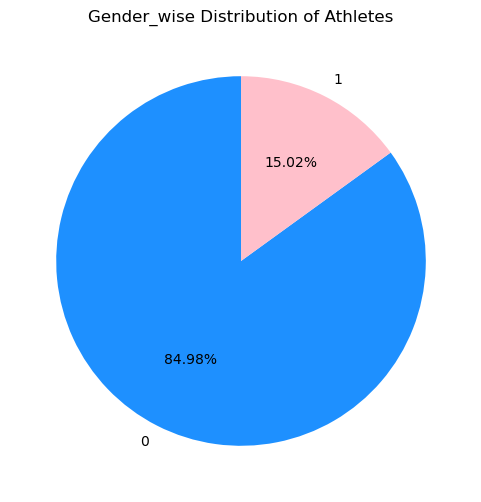

In [ ]:
# Count gender distribution
M_F_counts = df1['Sex'].value_counts()

# pie chart
plt.figure(figsize=(6, 6))
plt.pie(M_F_counts, labels=M_F_counts.index, autopct='%.2f%%', startangle=90, colors=['dodgerblue', 'pink']) # 1= female, 0=male
plt.title('Gender_wise Distribution of Athletes')


# Show the plot
plt.show()

#### 27. Create a sunburst chart to show the distribution of athletes based on Sex, BMI levels, and Age ranges.

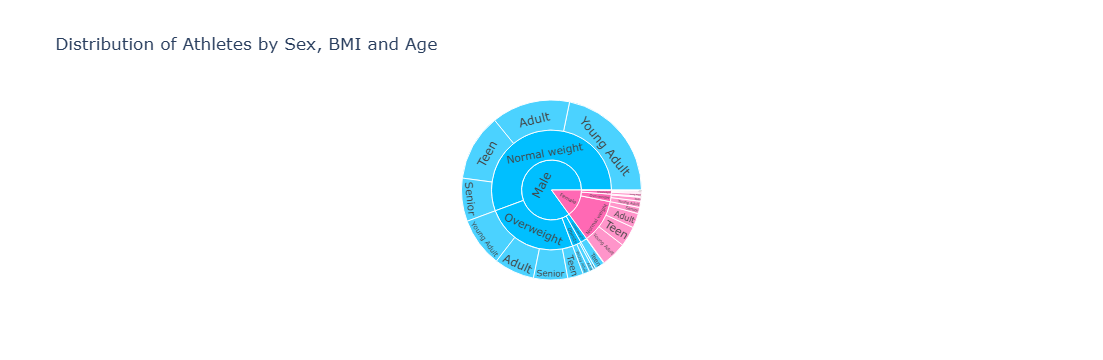

In [ ]:
df1_copy = df1.copy()

#BMI Distribution
df1_copy['Height_m'] = df1_copy['Height']/100  #height im cm to height in m 
df1_copy['BMI'] = df1_copy['Weight'] / (df1_copy['Height_m'] ** 2)

def func_bmi(BMI):
    if BMI < 18.5:
        return 'Underweight'
    elif 18.5 <= BMI < 25:
        return 'Normal weight'
    elif 25 <= BMI < 30:
        return 'Overweight'
    else:
        return 'Obesity'

#Age Distribution
def func_age(Age):
    
    Age = float(Age)
    if Age < 20:
        return 'Teen'
    elif 20 <= Age < 30:
        return 'Young Adult'
    elif 30 <= Age < 40:
        return 'Adult'
    else:
        return 'Senior'

#Sex Distribution
def func_sex(Sex):
    if Sex == 0:
        return 'Male'
    else:
        return 'Female'

#Create new columns in df1_copy
df1_copy['BMI'] = df1_copy['BMI'].apply(func_bmi)
df1_copy['Age'] = df1_copy['Age'].apply(func_age)
df1_copy['Sex'] = df1_copy['Sex'].apply(func_sex)

#Create a Sunburst Chart
fig = px.sunburst(
    df1_copy,
    path=['Sex', 'BMI', 'Age'],  # Order of hierarchy
    values=None, 
    color='Sex',
    color_discrete_map={'Male':'deepskyblue', 'Female':'hotpink'},  
    title="Distribution of Athletes by Sex, BMI and Age"
)

fig.show()


In [ ]:
print("revathy")

revathy
